In [1]:
import pandas as pd
import re
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
with open('./july_31.log','r') as f:
    log = f.readlines()
    print(log)

['2019-07-31 20:08:19,097 - INFO: Person Detected\n', '2019-07-31 20:08:19,127 - INFO: Person Detected\n', '2019-07-31 20:08:19,153 - INFO: Person Detected\n', '2019-07-31 20:08:19,181 - INFO: Person Detected\n', '2019-07-31 20:08:19,219 - INFO: Person Detected\n', '2019-07-31 20:08:19,250 - INFO: Person Detected\n', '2019-07-31 20:08:19,289 - INFO: Person Detected\n', '2019-07-31 20:08:19,318 - INFO: Person Detected\n', '2019-07-31 20:08:19,351 - INFO: Person Detected\n', '2019-07-31 20:08:19,390 - INFO: Person Detected\n', '2019-07-31 20:08:19,419 - INFO: Person Detected\n', '2019-07-31 20:08:19,451 - INFO: Person Detected\n', '2019-07-31 20:08:19,489 - INFO: Person Detected\n', '2019-07-31 20:08:19,519 - INFO: Person Detected\n', '2019-07-31 20:08:19,556 - INFO: Person Detected\n', '2019-07-31 20:08:19,588 - INFO: Person Detected\n', '2019-07-31 20:08:19,619 - INFO: Person Detected\n', '2019-07-31 20:08:19,657 - INFO: Person Detected\n', '2019-07-31 20:08:19,687 - INFO: Person Detec

In [35]:
date = []
#time = []
Info = []
with open('./july_31.log','r') as f:
    read = f.readlines()
    #print(read)
    for a in read:
        dt = a.split(',')[0]
        #tm = a.split(' ')[1]
        info = a.split(': ')[1]
        date.append(dt)
        time.append(tm)
        Info.append(info)

In [36]:
date

['2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:19',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:20',
 '2019-07-31 20:

In [37]:
log_df = pd.DataFrame()

In [38]:
log_df['Date'] = date
#log_df['Time'] = time
log_df['Info'] = Info

In [39]:
log_df['Info'].value_counts()

Person Detected\n    494
Name: Info, dtype: int64

In [40]:
log_df.replace(to_replace='Person Detected\n',value='Person Detected',inplace=True)

In [41]:
log_df.head()

,Date,Info
0,2019-07-31 20:08:19,Person Detected
1,2019-07-31 20:08:19,Person Detected
2,2019-07-31 20:08:19,Person Detected
3,2019-07-31 20:08:19,Person Detected
4,2019-07-31 20:08:19,Person Detected


In [9]:
rm_ms = []
for i in list(log_df['Time']):
    clc = re.match(r'\d+:\d+:\d+',i)
    rm_ms.append(clc.group(0))

In [10]:
log_df['Time'] = rm_ms

In [42]:
log_df

,Date,Info
0,2019-07-31 20:08:19,Person Detected
1,2019-07-31 20:08:19,Person Detected
2,2019-07-31 20:08:19,Person Detected
3,2019-07-31 20:08:19,Person Detected
4,2019-07-31 20:08:19,Person Detected
5,2019-07-31 20:08:19,Person Detected
6,2019-07-31 20:08:19,Person Detected
7,2019-07-31 20:08:19,Person Detected
8,2019-07-31 20:08:19,Person Detected
9,2019-07-31 20:08:19,Person Detected


In [43]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
Date    494 non-null object
Info    494 non-null object
dtypes: object(2)
memory usage: 7.8+ KB


In [13]:
#log_df['Date'] = pd.to_datetime(log_df['Date'])

In [14]:
#log_df['Time'] = pd.to_timedelta(log_df['Time'])

In [44]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
Date    494 non-null object
Info    494 non-null object
dtypes: object(2)
memory usage: 7.8+ KB


In [45]:
le = LabelEncoder()

In [46]:
log_df['Info'] = le.fit_transform(log_df['Info'])

In [47]:
timegroup = log_df.groupby('Date')

In [49]:
data = pd.DataFrame(log_df['Date'].value_counts())

In [50]:
data.reset_index(inplace=True)

In [51]:
Final_df = pd.DataFrame()

In [53]:
Final_df['Time'] = data['index']
Final_df['Count'] = data['Date']

In [54]:
sorted(list(Final_df['Time']))

['2019-07-31 20:08:19',
 '2019-07-31 20:08:20',
 '2019-07-31 20:08:21',
 '2019-07-31 20:09:08',
 '2019-07-31 20:09:09',
 '2019-07-31 20:09:10',
 '2019-07-31 20:09:46',
 '2019-07-31 20:09:47',
 '2019-07-31 20:09:48',
 '2019-07-31 20:09:49',
 '2019-07-31 20:09:50',
 '2019-07-31 20:10:06',
 '2019-07-31 20:10:07',
 '2019-07-31 20:10:08',
 '2019-07-31 20:10:17',
 '2019-07-31 20:10:18',
 '2019-07-31 20:10:19',
 '2019-07-31 20:10:21',
 '2019-07-31 20:10:43',
 '2019-07-31 20:10:44',
 '2019-07-31 20:10:45',
 '2019-07-31 20:10:46',
 '2019-07-31 20:10:47',
 '2019-07-31 20:11:07',
 '2019-07-31 20:11:08',
 '2019-07-31 20:11:09',
 '2019-07-31 20:11:16',
 '2019-07-31 20:11:17',
 '2019-07-31 20:11:18',
 '2019-07-31 20:11:19',
 '2019-07-31 20:11:20',
 '2019-07-31 20:19:07']

In [55]:
Final_df.sort_values(by='Time',inplace=True)

In [56]:
Final_df.reset_index(inplace=True)

In [57]:
Final_df.head(3)

,index,Time,Count
0,5,2019-07-31 20:08:19,28
1,0,2019-07-31 20:08:20,30
2,9,2019-07-31 20:08:21,24


In [58]:
Final_Data = Final_df[['Time','Count']]

In [59]:
Final_Data

,Time,Count
0,2019-07-31 20:08:19,28
1,2019-07-31 20:08:20,30
2,2019-07-31 20:08:21,24
3,2019-07-31 20:09:08,18
4,2019-07-31 20:09:09,24
5,2019-07-31 20:09:10,9
6,2019-07-31 20:09:46,2
7,2019-07-31 20:09:47,7
8,2019-07-31 20:09:48,26
9,2019-07-31 20:09:49,19


In [60]:
Final_Data.to_csv('log_data.csv')

<BarContainer object of 32 artists>

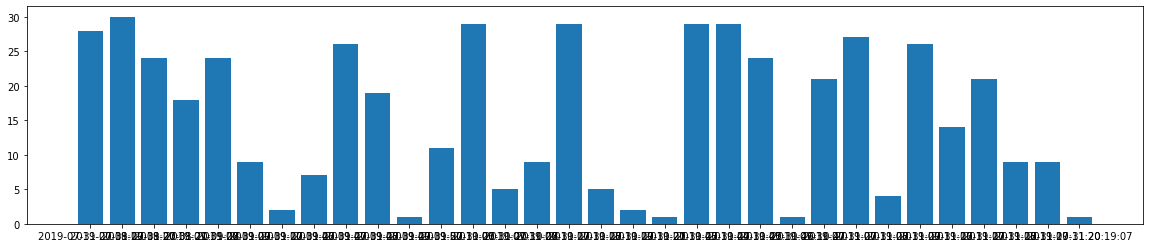

In [61]:
plt.figure(figsize=(20,4))
plt.bar(Final_Data['Time'],Final_Data['Count'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

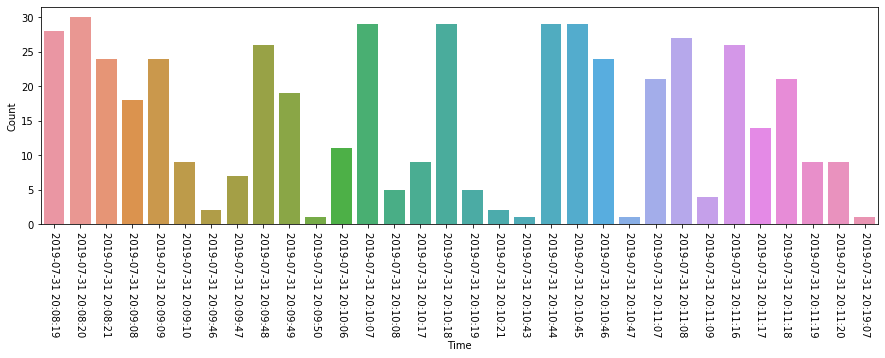

In [62]:
plt.figure(figsize=(15,4))
sns.barplot(Final_Data['Time'],Final_Data['Count'])
plt.xticks(rotation=270)